In [ ]:
######################################################################################
Copyright (c) 2023, 2024 , Prof. Radhamadhab Dalai, ITER , Siksha O Aanusandhan University, 
Odisha, India
Author's email address :  radhamadhabdalai@soa.ac.in
#####################################################################################v

Iris dataset has 59 rows and 7 columns

Here are the first 5 rows of the data:

   fruit_label  fruit_name  fruit_subtype  mass  width  height  color_score
0            1           0              0   192    8.4     7.3         0.55
1            1           0              0   180    8.0     6.8         0.59
2            1           0              0   176    7.4     7.2         0.60
3            2           1              1    86    6.2     4.7         0.80
4            2           1              1    84    6.0     4.6         0.79

Some simple statistics on the Iris dataset:

       fruit_label  fruit_name  fruit_subtype        mass      width  \
count    59.000000   59.000000      59.000000   59.000000  59.000000   
mean      2.542373    1.542373       5.305085  163.118644   7.105085   
std       1.208048    1.208048       2.878303   55.018832   0.816938   
min       1.000000    0.000000       0.000000   76.000000   5.800000   
25%       1.000000    0.000000       3.000000  140.000000 

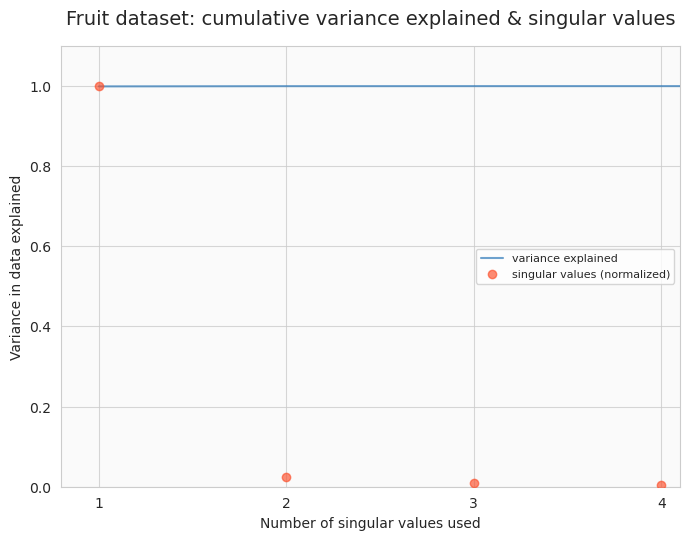

In [8]:
#Feature Engineering
#SVD from sklearn
#routine method for converting categorical(qualititaive data) to numerical data
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from scipy.stats import randint

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, consensus_score, ConfusionMatrixDisplay, f1_score, classification_report)

data = pd.read_csv('fruit_data.csv')
df = pd.DataFrame(data)
class_names = df['fruit_name'].unique()

#print(df)
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

# print dataframe
#df  
X = df.to_numpy()
X1 = X[:, 3:7]   ## features  : X -> x1, x2,.....xn
Y1 = X[:,1]      # Output : Y
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
X_train, X_test ,Y_train, Y_test = train_test_split(X1,Y1,test_size=0.33 , random_state= 42)



print('Iris dataset has {} rows and {} columns\n'.format(*df.shape))

print('Here are the first 5 rows of the data:\n\n{}\n'.format(df.head(5)))

print('Some simple statistics on the Iris dataset:\n\n{}\n'.format(df.describe()))


U, S, V = np.linalg.svd(df, full_matrices=False)

# U : Left Singular Vector matrix

print('matrix U has {} rows, {} columns\n'.format(*U.shape))
print('here are the first 5 rows.')

print('{}'.format(pd.DataFrame(U).head(5)))

# V : Right Singular Vector matrix


print('matrix Vt has {} rows, {} columns\n'.format(*V.shape))

print('{}'.format(pd.DataFrame(V).head()))


# Σ: singular values of  X

num_sv = np.arange(1, S.size+1)
cum_var_explained = [np.sum(np.square(S[0:n])) / np.sum(np.square(S)) for n in num_sv]

fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.plot(num_sv,
         cum_var_explained,
         color='#2171b5',
         label='variance explained',
         alpha=0.65,
         zorder=1000)

plt.scatter(num_sv,
            sklearn.preprocessing.normalize(S.reshape((1,-1))),
            color='#fc4e2a',
            label='singular values (normalized)',
            alpha=0.65,
            zorder=1000)

plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv)
ax.set_xlim(0.8, 4.1)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel(r'Number of singular values used')
ax.set_ylabel('Variance in data explained')
ax.set_title('Fruit dataset: cumulative variance explained & singular values',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()
